In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading
import pandas as pd
import numpy as np
import missingno as msno
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
# Classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 855.6 kB/s eta 0:00:00


**Mengumpulkan data**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hotel_Reservations.csv')

**Menelaah data**

In [ ]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2.0,0.0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2.0,0.0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1.0,0.0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2.0,0.0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2.0,0.0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3.0,0.0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2.0,0.0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2.0,0.0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2.0,0.0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2.0,0.0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [ ]:
data.shape

(36275, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36272 non-null  float64
 2   no_of_children                        36270 non-null  float64
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36272.000000,36270.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.847182,0.105294,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.568874,0.402674,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,30.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


**Memvalidasi data**

In [ ]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            3
no_of_children                          5
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     4
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
data.booking_status.value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

**Menentukan objek data**

In [ ]:
object_data = data[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
    'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
    'room_type_reserved', 'lead_time', 'market_segment_type', 'repeated_guest',
    'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
    'avg_price_per_room', 'no_of_special_requests', 'booking_status']]

**Membersihkan data**

In [ ]:
object_data.dropna(subset=['no_of_adults', 'no_of_children', 'market_segment_type'], inplace=True)

In [ ]:
object_data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
data = object_data.drop_duplicates()
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2.0,0.0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled
1,2.0,0.0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,1.0,0.0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled
3,2.0,0.0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled
4,2.0,0.0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36269,2.0,2.0,0,1,Meal Plan 1,0,Room_Type 6,0,Online,0,0,0,216.00,0,Canceled
36270,3.0,0.0,2,6,Meal Plan 1,0,Room_Type 4,85,Online,0,0,0,167.80,1,Not_Canceled
36271,2.0,0.0,1,3,Meal Plan 1,0,Room_Type 1,228,Online,0,0,0,90.95,2,Canceled
36272,2.0,0.0,2,6,Meal Plan 1,0,Room_Type 1,148,Online,0,0,0,98.39,2,Not_Canceled


**Mengkonstruksi data**

In [ ]:
data.dtypes

no_of_adults                            float64
no_of_children                          float64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [ ]:
meal = data['type_of_meal_plan'].value_counts()
meal

Meal Plan 1     20022
Not Selected     4364
Meal Plan 2      1133
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [ ]:
room_type = data['room_type_reserved'].value_counts()
room_type

Room_Type 1    18204
Room_Type 4     5391
Room_Type 6      940
Room_Type 2      597
Room_Type 5      230
Room_Type 7      156
Room_Type 3        6
Name: room_type_reserved, dtype: int64

In [ ]:
market = data['market_segment_type'].value_counts()
market

Online           19785
Offline           4033
Corporate         1289
Complementary      321
Aviation            96
Name: market_segment_type, dtype: int64

In [ ]:
data['type_of_meal_plan'] = LabelEncoder().fit_transform(data['type_of_meal_plan'])
data['room_type_reserved'] = LabelEncoder().fit_transform(data['room_type_reserved'])
data['market_segment_type'] = LabelEncoder().fit_transform(data['market_segment_type'])

In [ ]:
data.dtypes

no_of_adults                            float64
no_of_children                          float64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [ ]:
meal = data['type_of_meal_plan'].value_counts()
meal

0    20022
3     4364
1     1133
2        5
Name: type_of_meal_plan, dtype: int64

In [ ]:
room_type = data['room_type_reserved'].value_counts()
room_type

0    18204
3     5391
5      940
1      597
4      230
6      156
2        6
Name: room_type_reserved, dtype: int64

In [ ]:
market = data['market_segment_type'].value_counts()
market

4    19785
3     4033
2     1289
1      321
0       96
Name: market_segment_type, dtype: int64

In [ ]:
# market_5 = data[data['market_segment_type'] == 5]
# market_5

**Menentukan Label**

In [ ]:
data.loc[(data['no_of_previous_cancellations'] < 3), 'Kategori'] = 'Jarang'
data.loc[(data['no_of_previous_cancellations'] > 3), 'Kategori'] = 'Sering'
data.loc[(data['no_of_previous_cancellations'] > 10), 'Kategori'] = 'Sangat Sering'

data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Kategori
0,2.0,0.0,1,2,0,0,0,224,3,0,0,0,65.00,0,Not_Canceled,Jarang
1,2.0,0.0,2,3,3,0,0,5,4,0,0,0,106.68,1,Not_Canceled,Jarang
2,1.0,0.0,2,1,0,0,0,1,4,0,0,0,60.00,0,Canceled,Jarang
3,2.0,0.0,0,2,0,0,0,211,4,0,0,0,100.00,0,Canceled,Jarang
4,2.0,0.0,1,1,3,0,0,48,4,0,0,0,94.50,0,Canceled,Jarang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36269,2.0,2.0,0,1,0,0,5,0,4,0,0,0,216.00,0,Canceled,Jarang
36270,3.0,0.0,2,6,0,0,3,85,4,0,0,0,167.80,1,Not_Canceled,Jarang
36271,2.0,0.0,1,3,0,0,0,228,4,0,0,0,90.95,2,Canceled,Jarang
36272,2.0,0.0,2,6,0,0,0,148,4,0,0,0,98.39,2,Not_Canceled,Jarang


In [ ]:
data.no_of_previous_cancellations.value_counts()

0     25255
1       132
2        46
3        43
11       25
5        11
4        10
13        1
6         1
Name: no_of_previous_cancellations, dtype: int64

In [ ]:
data.Kategori.value_counts()

Jarang           25433
Sangat Sering       26
Sering              22
Name: Kategori, dtype: int64

In [ ]:
#cek
data.loc[data['no_of_previous_cancellations'] == 4, 'Kategori']

1590     Sering
3050     Sering
4828     Sering
21162    Sering
22881    Sering
25478    Sering
26962    Sering
27665    Sering
31999    Sering
35983    Sering
Name: Kategori, dtype: object

In [ ]:
drop = data.drop(["Kategori"], axis=1)
data = drop
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2.0,0.0,1,2,0,0,0,224,3,0,0,0,65.00,0,Not_Canceled
1,2.0,0.0,2,3,3,0,0,5,4,0,0,0,106.68,1,Not_Canceled
2,1.0,0.0,2,1,0,0,0,1,4,0,0,0,60.00,0,Canceled
3,2.0,0.0,0,2,0,0,0,211,4,0,0,0,100.00,0,Canceled
4,2.0,0.0,1,1,3,0,0,48,4,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36269,2.0,2.0,0,1,0,0,5,0,4,0,0,0,216.00,0,Canceled
36270,3.0,0.0,2,6,0,0,3,85,4,0,0,0,167.80,1,Not_Canceled
36271,2.0,0.0,1,3,0,0,0,228,4,0,0,0,90.95,2,Canceled
36272,2.0,0.0,2,6,0,0,0,148,4,0,0,0,98.39,2,Not_Canceled


**Modelling**

In [ ]:
X = data.drop(["booking_status"], axis=1)
y = data["booking_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.0,0.0,1,2,0,0,0,224,3,0,0,0,65.00,0
1,2.0,0.0,2,3,3,0,0,5,4,0,0,0,106.68,1
2,1.0,0.0,2,1,0,0,0,1,4,0,0,0,60.00,0
3,2.0,0.0,0,2,0,0,0,211,4,0,0,0,100.00,0
4,2.0,0.0,1,1,3,0,0,48,4,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36269,2.0,2.0,0,1,0,0,5,0,4,0,0,0,216.00,0
36270,3.0,0.0,2,6,0,0,3,85,4,0,0,0,167.80,1
36271,2.0,0.0,1,3,0,0,0,228,4,0,0,0,90.95,2
36272,2.0,0.0,2,6,0,0,0,148,4,0,0,0,98.39,2


In [ ]:
y

0        Not_Canceled
1        Not_Canceled
2            Canceled
3            Canceled
4            Canceled
             ...     
36269        Canceled
36270    Not_Canceled
36271        Canceled
36272    Not_Canceled
36273        Canceled
Name: booking_status, Length: 25524, dtype: object

In [ ]:
print(X.shape)
print(y.shape)

(25524, 15)
(25524,)


Not_Canceled    18127
Canceled         7397
Name: booking_status, dtype: int64

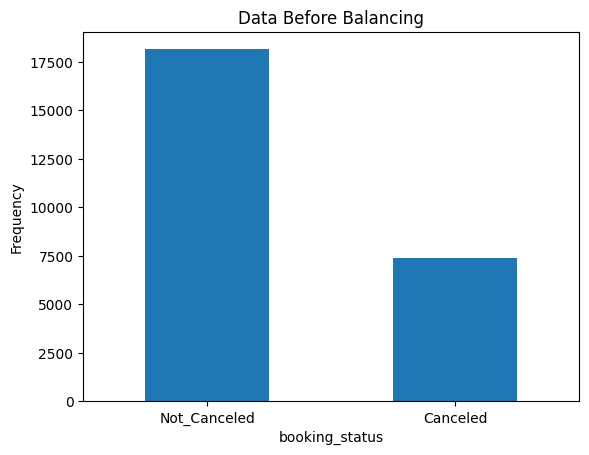

In [ ]:
pd.value_counts(y).plot.bar()
plt.title('Data Before Balancing')
plt.xticks(rotation=0)
plt.xlabel('booking_status')
plt.ylabel('Frequency')
y.value_counts()

In [ ]:
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [ ]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(27206, 14)
(27206,)


Not_Canceled    13603
Canceled        13603
Name: booking_status, dtype: int64

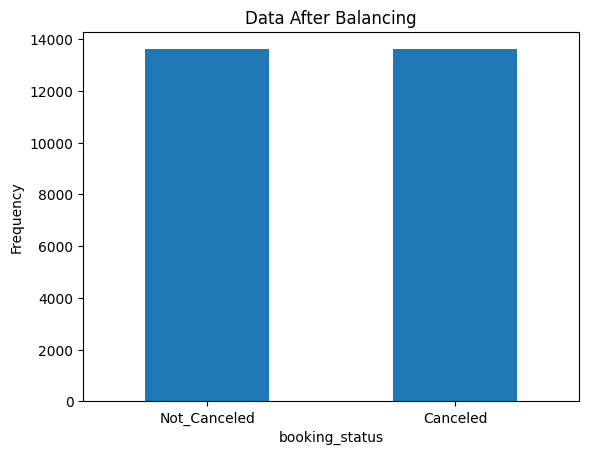

In [ ]:
pd.value_counts(y_train_resampled).plot.bar()
plt.title('Data After Balancing')
plt.xticks(rotation=0)
plt.xlabel('booking_status')
plt.ylabel('Frequency')
y_train_resampled.value_counts()

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_resampled, y_train_resampled)
dt_predict = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)
rf_predict= rf.predict(X_test)

In [ ]:
#Create confusion matrices
dt_cm = confusion_matrix(y_test, dt_predict)
rf_cm = confusion_matrix(y_test, rf_predict)

In [ ]:
#Evaluation
dt_accuracy = accuracy_score(y_test, dt_predict)
rf_accuracy = accuracy_score(y_test, rf_predict)

dt_classification_rep = classification_report(y_test, dt_predict)
rf_classification_rep = classification_report(y_test, rf_predict)

In [ ]:
print("Decision Tree")
print('confussion matrix : \n', dt_cm)
print('\n')
print('accuracy :', dt_accuracy)
print('\n')
print('clasification report : \n', dt_classification_rep)

Decision Tree
confussion matrix : 
 [[1208  649]
 [ 703 3821]]


accuracy : 0.7881209841717599


clasification report : 
               precision    recall  f1-score   support

    Canceled       0.63      0.65      0.64      1857
Not_Canceled       0.85      0.84      0.85      4524

    accuracy                           0.79      6381
   macro avg       0.74      0.75      0.75      6381
weighted avg       0.79      0.79      0.79      6381



In [ ]:
print("Random Forest")
print('confussion matrix : \n', rf_cm )
print('\n')
print('accuracy :', rf_accuracy)
print('\n')
print('clasification report :\n', rf_classification_rep)

Random Forest
confussion matrix : 
 [[1260  597]
 [ 527 3997]]


accuracy : 0.8238520608055164


clasification report :
               precision    recall  f1-score   support

    Canceled       0.71      0.68      0.69      1857
Not_Canceled       0.87      0.88      0.88      4524

    accuracy                           0.82      6381
   macro avg       0.79      0.78      0.78      6381
weighted avg       0.82      0.82      0.82      6381

